Klasifikační zpráva pro k-NN:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       150
           1       0.61      0.51      0.55        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.71      0.71      0.71       231



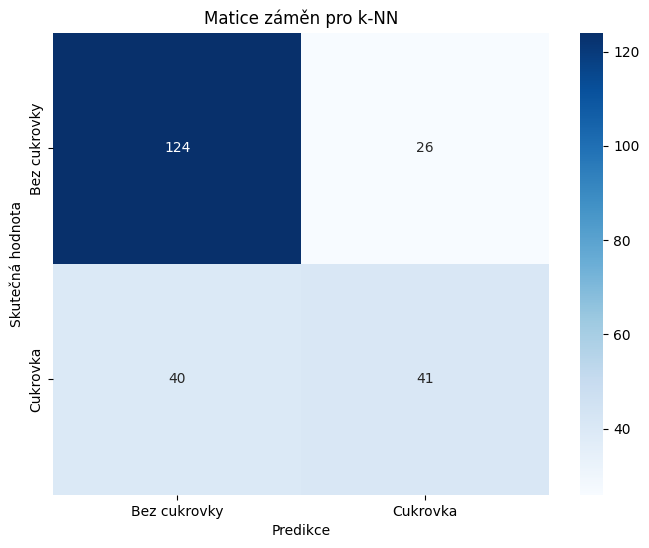

Klasifikační zpráva pro SVM:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       150
           1       0.65      0.48      0.55        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



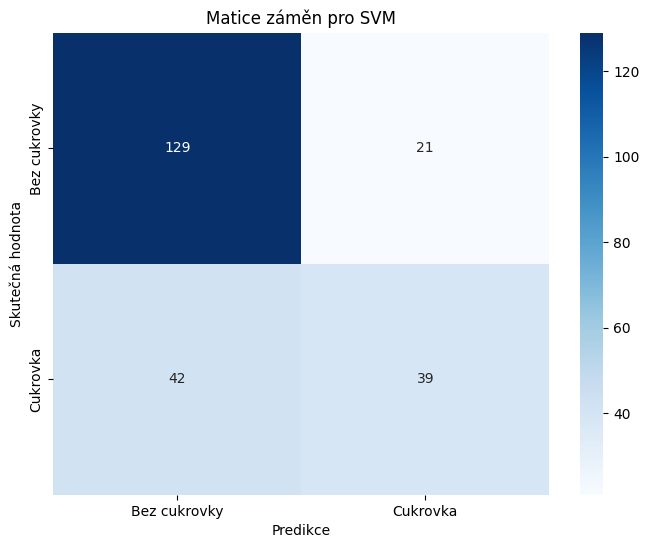

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Function to classify blood pressure into categories
def classify_blood_pressure(row):
    systolic = row['BloodPressure']
    if systolic < 90:
        return 'Low'
    elif 90 <= systolic < 120:
        return 'Normal'
    elif 120 <= systolic < 140:
        return 'High'
    else:
        return 'Hypertensive Crisis'

# Apply blood pressure classification
data['BloodPressureCategory'] = data.apply(classify_blood_pressure, axis=1)

# Convert categorical blood pressure categories to numerical values using LabelEncoder
label_encoder = LabelEncoder()
data['BloodPressureCategory'] = label_encoder.fit_transform(data['BloodPressureCategory'])

# Prepare data for modeling (drop 'Outcome' and original 'BloodPressure')
X = data.drop(columns=['Outcome', 'BloodPressure'])
y = data['Outcome']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train the k-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions using the k-NN model
y_pred_knn = knn_model.predict(X_test)

# Print classification report for k-NN
print("Classification Report for k-NN:\n", classification_report(y_test, y_pred_knn))

# Confusion matrix for k-NN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix for k-NN")
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train the Support Vector Machine (SVM) model with a linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Print classification report for SVM
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix for SVM")
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
